In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
data= pd.read_csv('/content/brain_stroke.csv')

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [7]:
data.shape

(4981, 11)

In [8]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [11]:
data['age'].value_counts()

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [12]:
data['gender'].fillna("Male",inplace = True)
data['age'].fillna(data['age'].mean(),inplace = True)
data['ever_married'].fillna("Yes",inplace = True)
data['work_type'].fillna("Private",inplace = True)
data['Residence_type'].fillna("Urban",inplace = True)
data['avg_glucose_level'].fillna(data['avg_glucose_level'].mean(),inplace = True)
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
data['smoking_status'].fillna("formerly smoked",inplace = True)

In [13]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

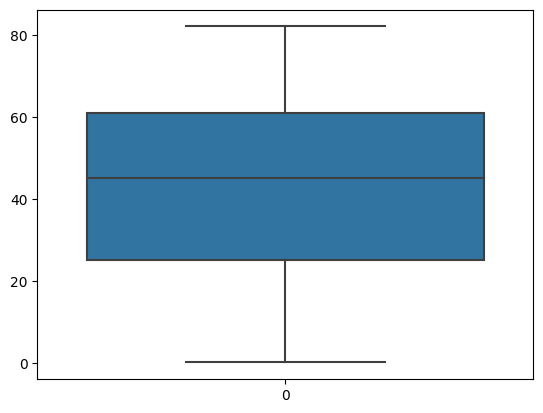

In [14]:
sns.boxplot(data['age'])

In [15]:
data['age']=np.where(data['age']>40,35,data['age'])

<Axes: >

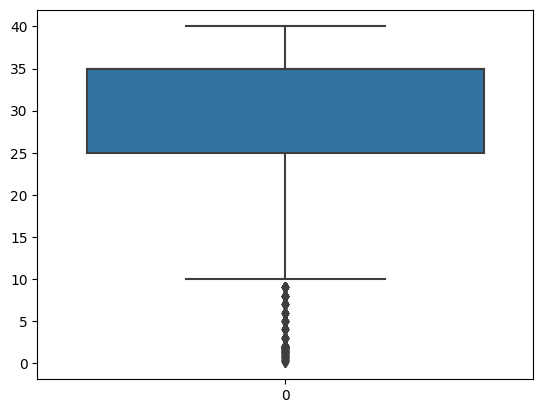

In [16]:
sns.boxplot(data['age'])

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,35.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,35.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,35.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,35.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,35.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [21]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,35.0,0,1,1,1,1,228.69,36.6,1,1
1,1,35.0,0,1,1,1,0,105.92,32.5,2,1
2,0,35.0,0,0,1,1,1,171.23,34.4,3,1
3,0,35.0,1,0,1,2,0,174.12,24.0,2,1
4,1,35.0,0,0,1,1,1,186.21,29.0,1,1


In [22]:
y = data['stroke']
x = data.drop(columns = ['stroke'])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scale = StandardScaler()

In [25]:
names = x.columns

In [26]:
x = scale.fit_transform(x)

In [27]:
x

array([[ 1.18390850e+00,  5.65872809e-01, -3.26185770e-01, ...,
         2.72341090e+00,  1.19323816e+00, -3.53933192e-01],
       [ 1.18390850e+00,  5.65872809e-01, -3.26185770e-01, ...,
        -5.22766599e-04,  5.89389611e-01,  5.78839946e-01],
       [-8.44659868e-01,  5.65872809e-01, -3.26185770e-01, ...,
         1.44852918e+00,  8.69221866e-01,  1.51161308e+00],
       ...,
       [-8.44659868e-01,  5.65872809e-01,  3.06573766e+00, ...,
        -2.42364234e-01,  4.86293516e-01,  1.51161308e+00],
       [ 1.18390850e+00,  1.04985980e+00, -3.26185770e-01, ...,
        -4.88199415e-01,  2.21189274e-01,  1.51161308e+00],
       [-8.44659868e-01,  5.65872809e-01,  3.06573766e+00, ...,
        -4.92415000e-01,  8.86371531e-02,  5.78839946e-01]])

In [28]:
x = pd.DataFrame(x,columns = names)

In [29]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.183909,0.565873,-0.326186,4.136753,0.720137,-0.351534,0.983473,2.723411,1.193238,-0.353933
1,1.183909,0.565873,-0.326186,4.136753,0.720137,-0.351534,-1.016804,-0.000523,0.589390,0.578840
2,-0.844660,0.565873,-0.326186,-0.241735,0.720137,-0.351534,0.983473,1.448529,0.869222,1.511613
3,-0.844660,0.565873,3.065738,-0.241735,0.720137,0.811143,-1.016804,1.512650,-0.662492,0.578840
4,1.183909,0.565873,-0.326186,-0.241735,0.720137,-0.351534,0.983473,1.780895,0.073909,-0.353933


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3984, 10)
(997, 10)
(3984,)
(997,)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [34]:
dtree = DecisionTreeClassifier()
rand = RandomForestClassifier()

In [35]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
ytr = dtree.predict(x_train)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
print(accuracy_score(y_train,ytr))

1.0


In [39]:
print(confusion_matrix(y_train,ytr))

[[3794    0]
 [   0  190]]


In [40]:
ytt = dtree.predict(x_test)

In [41]:
print(accuracy_score(y_test,ytt))

0.8936810431293881


In [42]:
print(confusion_matrix(y_test,ytt))

[[886  53]
 [ 53   5]]


RandomForest

In [43]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
ytr = rand.predict(x_train)

In [45]:
print(accuracy_score(y_train,ytr))

1.0


In [46]:
print(confusion_matrix(y_train,ytr))

[[3794    0]
 [   0  190]]


In [47]:
ytt = rand.predict(x_test)

In [48]:
print(accuracy_score(y_test,ytt))

0.9378134403209629


In [49]:
print(confusion_matrix(y_test,ytt))

[[935   4]
 [ 58   0]]


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf = RandomForestClassifier()

In [52]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
predict = clf.predict(x_test)

Logic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logi = LogisticRegression()

In [56]:
logi.fit(x_train,y_train)

LogisticRegression()

In [57]:
ytr = logi.predict(x_train)

In [58]:
print(accuracy_score(y_train,ytr))

0.9523092369477911


In [59]:
ytt = logi.predict(x_test)

In [60]:
print(accuracy_score(y_test,ytt))

0.9418254764292878


KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier()

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
ytr = knn.predict(x_train)

In [65]:
print(accuracy_score(y_train,ytr))

0.9525602409638554


In [66]:
ytt = knn.predict(x_test)

In [67]:
print(accuracy_score(y_test,ytt))

0.9398194583751254


SVM

In [68]:
from sklearn.svm import SVC

In [69]:
svc = SVC()

In [70]:
svc.fit(x_train,y_train)

SVC()

In [71]:
ytr = svc.predict(x_train)

In [72]:
print(accuracy_score(y_train,ytr))

0.9523092369477911


In [73]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,35.0,0,1,1,1,1,228.69,36.6,1,1
1,1,35.0,0,1,1,1,0,105.92,32.5,2,1
2,0,35.0,0,0,1,1,1,171.23,34.4,3,1
3,0,35.0,1,0,1,2,0,174.12,24.0,2,1
4,1,35.0,0,0,1,1,1,186.21,29.0,1,1


In [74]:
data.shape

(4981, 11)

In [75]:
import pickle

In [76]:
pickle.dump(rand,open("model.pkl","wb"))

In [77]:
pwd

'/content'